Test data files not found. Loading and preprocessing test data from directory.


C:\Users\vikne\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 - 3s - 154ms/step - accuracy: 0.8542 - loss: 0.3464
Test accuracy: 0.8541666865348816
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.85      0.94      0.89       390
   Normal (Class 1)       0.87      0.72      0.79       234

           accuracy                           0.85       624
          macro avg       0.86      0.83      0.84       624
       weighted avg       0.86      0.85      0.85       624



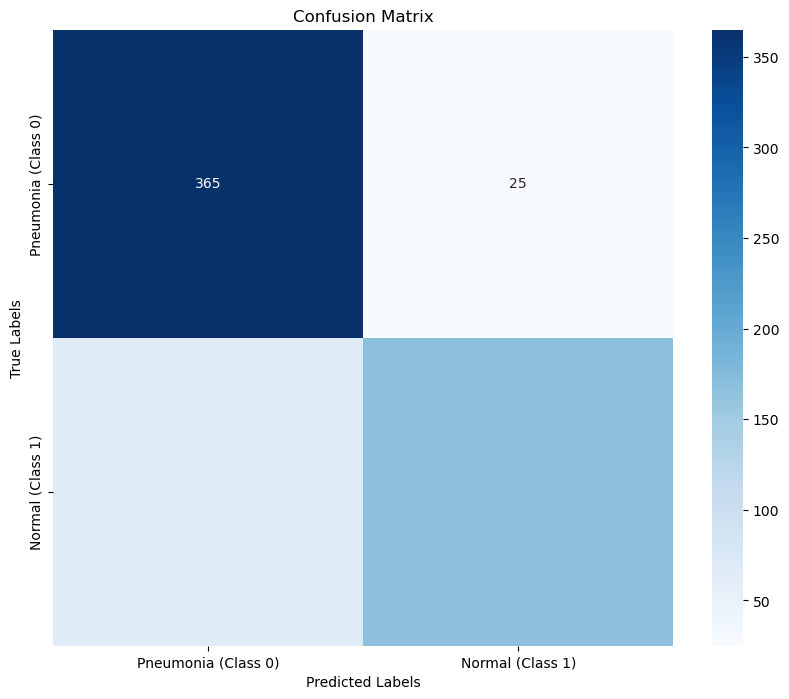

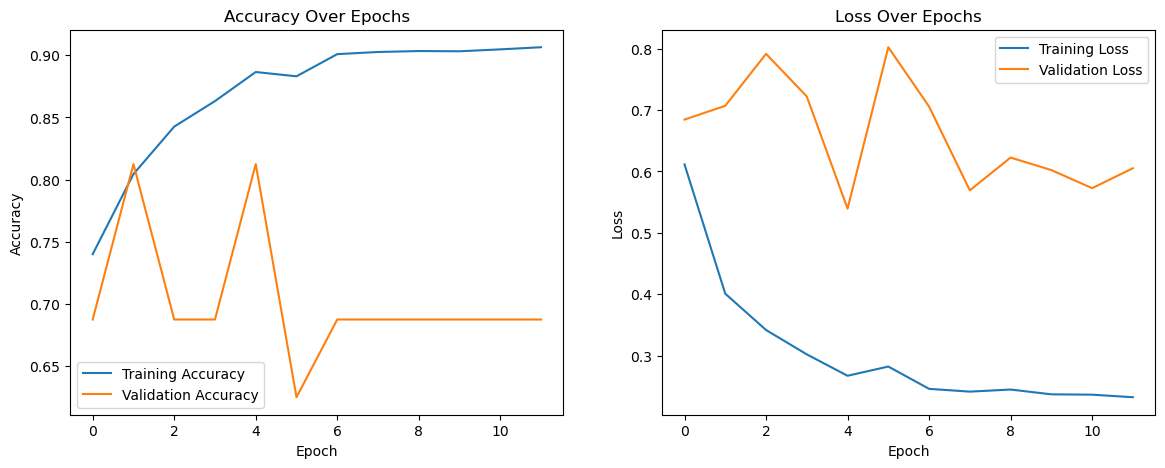

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

# Define constants
img_size = 150
labels = ['PNEUMONIA', 'NORMAL']

# Function to get data from directory
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:  # Ensure the image is read correctly
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

# Try to load the test data, or preprocess if files are not found
try:
    x_test = np.load('x_test.npy')
    y_test = np.load('y_test.npy')
except FileNotFoundError:
    print("Test data files not found. Loading and preprocessing test data from directory.")
    test_data = get_data('../../chest_xray/test')
    x_test, y_test = [], []
    for feature, label in test_data:
        x_test.append(feature)
        y_test.append(label)
    x_test = np.array(x_test) / 255.0
    y_test = np.array(y_test)

# Normalize the data
x_test = x_test.reshape(-1, img_size, img_size, 1)

# Load the trained model (assuming it was saved in 04_model_training.ipynb)
model = load_model('cnn_model_trained.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Generate predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Classification report
print(classification_report(y_test, y_pred, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Pneumonia (Class 0)', 'Normal (Class 1)'], columns=['Pneumonia (Class 0)', 'Normal (Class 1)'])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot accuracy and loss over epochs (assuming history was saved)
history = np.load('training_history.npy', allow_pickle=True).item()

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()